In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
import concurrent.futures

In [2]:
df=pd.read_csv("../data/keri_churn_data_tidy.csv")

KeyboardInterrupt: 

In [3]:
df.sort_values(by=['idadvertiser_varchar'], inplace=True)

In [4]:
df.shape

(3655071, 29)

In [3]:
df['time_stamp']=df.csr_year_varchar*100+df.csr_month_varchar

In [6]:
df.csr_month_varchar.isna().sum()

0

In [7]:
df.columns

Index(['csr_year_varchar', 'csr_month_varchar', 'idcampaign_master_varchar',
       'idcampaign_varchar', 'idadvertiser_varchar', 'advertiser_name_varchar',
       'advertiser_city_varchar', 'advertiser_state_varchar',
       'advertiser_zipcode_varchar', 'idbusinesscategory_varchar',
       'business_category_varchar', 'idbusinesssubcategory_varchar',
       'business_subcategory_varchar', 'idoffer_varchar', 'product_varchar',
       'stop_request_varchar', 'adv_change_type_varchar',
       'campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'businessuser_varchar', 'system_varchar', 'advtrans_varchar',
       'time_stamp'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

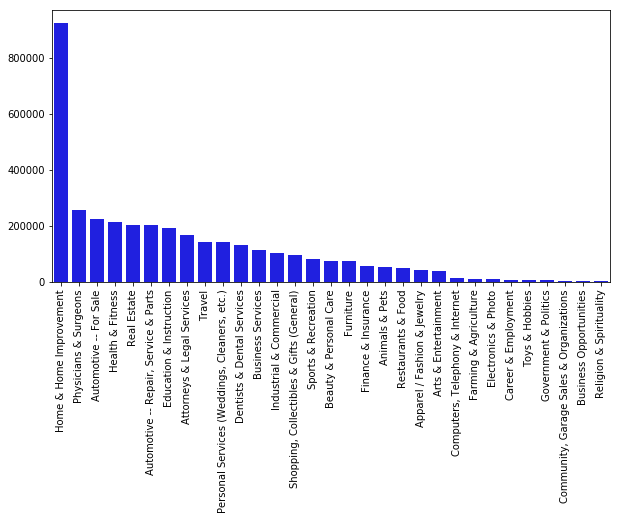

In [25]:
temp=df.business_category_varchar.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(temp.index, temp.values, color='b')
plt.xticks(rotation=90)

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [4]:
ids=df.idadvertiser_varchar.unique()
num_col=['campaign_budget_varchar', 'spend_varchar', 'clicks_varchar',
       'impressions_varchar', 'calls_varchar', 'qualified_calls_varchar',
       'emails_varchar', 'cvt_varchar', 'qualified_web_events_varchar',
       'advtrans_varchar']


In [5]:
def time_plot(temp, col_names, address):
    for col in col_names:
        plt.figure(figsize=(8,5))
        plt.cla()
        plt.plot(np.arange(0,temp.time_stamp.shape[0]), temp[col], LineWidth=4.0);
        plt.xlabel('Months', fontsize=18)
    #plt.yticks(rotation=45)
        plt.tick_params(direction='in', length=10, width=5, colors='k',
                   grid_color='k', grid_alpha=1, labelsize=20)
        ax = plt.gca()
        tag=temp.advertiser_name_varchar.iloc[0]+"-statrting: "+ \
        str(temp.csr_month_varchar.iloc[0])+"-"+str(temp.csr_year_varchar.iloc[0])
        plt.text(0.01,0.9, tag, transform=ax.transAxes, fontsize=15)
        ax.get_xaxis().get_major_formatter().set_useOffset(False)
        
        
        save_to=address+"/"+col+".png"
        plt.savefig(save_to)
        plt.close()

In [6]:
#def get_adv_plots( my_tuple=(ids, data_frame) ):
def get_adv_plots( my_tuple=(list, pd.DataFrame) ):
    ad_id=my_tuple[0]
    df=my_tuple[1]
    for ad_id in ids:
        temp=df[df.idadvertiser_varchar == ad_id].sort_values(by=['time_stamp'])
        address ='./advertisers/case_id_'+str(ad_id)
        print(address)
        os.makedirs(address, exist_ok=True)
        time_plot(temp, num_col, address) 

In [7]:
num_process=4
#df.shape
my_mod=np.floor_divide(df.shape[0],num_process)

indecies=[]
for i in range(0,num_process-1):
    indecies.append( (i*my_mod, (i+1)*my_mod) )

   
indecies

[(0, 913767), (913767, 1827534), (1827534, 2741301)]

In [ ]:
with concurrent.futures.ProcessPoolExecutor(max_workers=2) as executor:
    executor.map(get_adv_plots, [(ids, df.iloc[indecies[0][0]:indecies[0][1],:]), 
                          (ids, df.iloc[indecies[1][0]:indecies[1][1],:]), 
                          (ids, df.iloc[indecies[2][0]:indecies[2][1],:]),
                          (ids, df.iloc[indecies[2][1]:,:])])

./advertisers/case_id_84481
./advertisers/case_id_84546
./advertisers/case_id_84481
./advertisers/case_id_84545
./advertisers/case_id_83385
./advertisers/case_id_84481
./advertisers/case_id_84544
./advertisers/case_id_84481
./advertisers/case_id_84542
./advertisers/case_id_98633
./advertisers/case_id_84549
./advertisers/case_id_78153
./advertisers/case_id_83707
./advertisers/case_id_84551
./advertisers/case_id_84550
./advertisers/case_id_107809
./advertisers/case_id_84555
./advertisers/case_id_84552
./advertisers/case_id_142377
./advertisers/case_id_84553
./advertisers/case_id_84558
./advertisers/case_id_69182
./advertisers/case_id_84567
./advertisers/case_id_84572
./advertisers/case_id_84571
./advertisers/case_id_84575
./advertisers/case_id_83813
./advertisers/case_id_84576
./advertisers/case_id_84577
./advertisers/case_id_84579
./advertisers/case_id_84580
./advertisers/case_id_84581
./advertisers/case_id_84582
./advertisers/case_id_84583
./advertisers/case_id_84585
./advertisers/case

./advertisers/case_id_72821
./advertisers/case_id_84844
./advertisers/case_id_82339
./advertisers/case_id_84845
./advertisers/case_id_59442
./advertisers/case_id_141424
./advertisers/case_id_154458
./advertisers/case_id_84849
./advertisers/case_id_84850
./advertisers/case_id_84848
./advertisers/case_id_84852
./advertisers/case_id_84854
./advertisers/case_id_84851
./advertisers/case_id_56739
./advertisers/case_id_167123
./advertisers/case_id_84623
./advertisers/case_id_84855
./advertisers/case_id_5194
./advertisers/case_id_58713
./advertisers/case_id_52276
./advertisers/case_id_84903
./advertisers/case_id_84853
./advertisers/case_id_84918
./advertisers/case_id_84919
./advertisers/case_id_84917
./advertisers/case_id_36800
./advertisers/case_id_84924
./advertisers/case_id_16206
./advertisers/case_id_84925
./advertisers/case_id_84927
./advertisers/case_id_84928
./advertisers/case_id_95833
./advertisers/case_id_22705
./advertisers/case_id_112862
./advertisers/case_id_117787
./advertisers/ca

./advertisers/case_id_56492
./advertisers/case_id_85138
./advertisers/case_id_85140
./advertisers/case_id_85136
./advertisers/case_id_85142
./advertisers/case_id_28049
./advertisers/case_id_56117
./advertisers/case_id_85147
./advertisers/case_id_59629
./advertisers/case_id_85137
./advertisers/case_id_75363
./advertisers/case_id_84841
./advertisers/case_id_85152
./advertisers/case_id_85151
./advertisers/case_id_85109
./advertisers/case_id_85153
./advertisers/case_id_78417
./advertisers/case_id_37851
./advertisers/case_id_117320
./advertisers/case_id_85154
./advertisers/case_id_85156
./advertisers/case_id_85105
./advertisers/case_id_72935
./advertisers/case_id_85157
./advertisers/case_id_81784
./advertisers/case_id_84690
./advertisers/case_id_129449
./advertisers/case_id_85160
./advertisers/case_id_85164
./advertisers/case_id_85167
./advertisers/case_id_85169
./advertisers/case_id_65822
./advertisers/case_id_85172
./advertisers/case_id_85168
./advertisers/case_id_102515
./advertisers/cas

./advertisers/case_id_82881
./advertisers/case_id_85474
./advertisers/case_id_58222
./advertisers/case_id_85495
./advertisers/case_id_85503
./advertisers/case_id_85514
./advertisers/case_id_85515
./advertisers/case_id_85524
./advertisers/case_id_85525
./advertisers/case_id_85509
./advertisers/case_id_85456
./advertisers/case_id_85504
./advertisers/case_id_85526
./advertisers/case_id_85527
./advertisers/case_id_95897
./advertisers/case_id_85532
./advertisers/case_id_85533
./advertisers/case_id_85529
./advertisers/case_id_78890
./advertisers/case_id_85539
./advertisers/case_id_85538
./advertisers/case_id_85536
./advertisers/case_id_85534
./advertisers/case_id_89961
./advertisers/case_id_85550
./advertisers/case_id_85551
./advertisers/case_id_48183
./advertisers/case_id_36731
./advertisers/case_id_85555
./advertisers/case_id_85554
./advertisers/case_id_85464
./advertisers/case_id_85552
./advertisers/case_id_85556
./advertisers/case_id_85557
./advertisers/case_id_85558
./advertisers/case_i

./advertisers/case_id_85039
./advertisers/case_id_91934
./advertisers/case_id_85838
./advertisers/case_id_81568
./advertisers/case_id_85840
./advertisers/case_id_54031
./advertisers/case_id_85841
./advertisers/case_id_79074
./advertisers/case_id_85844
./advertisers/case_id_85845
./advertisers/case_id_85846
./advertisers/case_id_85847
./advertisers/case_id_85851
./advertisers/case_id_85854
./advertisers/case_id_85853
./advertisers/case_id_85757
./advertisers/case_id_108130
./advertisers/case_id_85858
./advertisers/case_id_85641
./advertisers/case_id_85862
./advertisers/case_id_9500
./advertisers/case_id_85863
./advertisers/case_id_85865
./advertisers/case_id_85864
./advertisers/case_id_93394
./advertisers/case_id_85699
./advertisers/case_id_85701
./advertisers/case_id_85867
./advertisers/case_id_56147
./advertisers/case_id_85702
./advertisers/case_id_85704
./advertisers/case_id_85861
./advertisers/case_id_85397
./advertisers/case_id_85868
./advertisers/case_id_85709
./advertisers/case_i

In [ ]:
for ad_id in ids:
    temp=df[df.idadvertiser_varchar == ad_id].sort_values(by=['time_stamp'])
    address ='./advertisers/case_id_'+str(ad_id)
    print(address)
    os.makedirs(address, exist_ok=True)
    time_plot(temp, num_col, address)
        
    

./advertisers/case_id_14
./advertisers/case_id_28
./advertisers/case_id_40
./advertisers/case_id_43
./advertisers/case_id_103
./advertisers/case_id_124
./advertisers/case_id_137
./advertisers/case_id_138
./advertisers/case_id_369
./advertisers/case_id_399
./advertisers/case_id_549
./advertisers/case_id_558
./advertisers/case_id_566
./advertisers/case_id_699
./advertisers/case_id_738
./advertisers/case_id_850
./advertisers/case_id_914
./advertisers/case_id_926
./advertisers/case_id_950
./advertisers/case_id_955
./advertisers/case_id_959
./advertisers/case_id_981
./advertisers/case_id_1007
./advertisers/case_id_1033
./advertisers/case_id_1214
./advertisers/case_id_1235
./advertisers/case_id_1267
./advertisers/case_id_1414
./advertisers/case_id_1420
./advertisers/case_id_1429
./advertisers/case_id_1446
./advertisers/case_id_1475
./advertisers/case_id_1499
./advertisers/case_id_1547
./advertisers/case_id_1568
./advertisers/case_id_1625
./advertisers/case_id_1638
./advertisers/case_id_1655


./advertisers/case_id_5680
./advertisers/case_id_5686
./advertisers/case_id_5688
./advertisers/case_id_5702
./advertisers/case_id_5707
./advertisers/case_id_5709
./advertisers/case_id_5724
./advertisers/case_id_5725
./advertisers/case_id_5739
./advertisers/case_id_5741
./advertisers/case_id_5747
./advertisers/case_id_5750
./advertisers/case_id_5756
./advertisers/case_id_5769
./advertisers/case_id_5778
./advertisers/case_id_5781
./advertisers/case_id_5787
./advertisers/case_id_5790
./advertisers/case_id_5793
./advertisers/case_id_5794
./advertisers/case_id_5810
./advertisers/case_id_5816
./advertisers/case_id_5818
./advertisers/case_id_5850
./advertisers/case_id_5888
./advertisers/case_id_5889
./advertisers/case_id_5892
./advertisers/case_id_5894
./advertisers/case_id_5906
./advertisers/case_id_5916
./advertisers/case_id_5935
./advertisers/case_id_5953
./advertisers/case_id_5962
./advertisers/case_id_5966
./advertisers/case_id_5977
./advertisers/case_id_6011
./advertisers/case_id_6018
.

./advertisers/case_id_7959
./advertisers/case_id_7972
./advertisers/case_id_7982
./advertisers/case_id_7985
./advertisers/case_id_8031
./advertisers/case_id_8043
./advertisers/case_id_8060
./advertisers/case_id_8073
./advertisers/case_id_8098
./advertisers/case_id_8115
./advertisers/case_id_8119
./advertisers/case_id_8126
./advertisers/case_id_8139
./advertisers/case_id_8142
./advertisers/case_id_8160
./advertisers/case_id_8165
./advertisers/case_id_8173
./advertisers/case_id_8197
./advertisers/case_id_8205
./advertisers/case_id_8209
./advertisers/case_id_8245
./advertisers/case_id_8247
./advertisers/case_id_8254
./advertisers/case_id_8282
./advertisers/case_id_8301
./advertisers/case_id_8314
./advertisers/case_id_8322
./advertisers/case_id_8328
./advertisers/case_id_8335
./advertisers/case_id_8346
./advertisers/case_id_8355
./advertisers/case_id_8372
./advertisers/case_id_8398
./advertisers/case_id_8399
./advertisers/case_id_8407
./advertisers/case_id_8412
./advertisers/case_id_8437
.

./advertisers/case_id_10825
./advertisers/case_id_10875
./advertisers/case_id_10892
./advertisers/case_id_10908
./advertisers/case_id_10909
./advertisers/case_id_10912
./advertisers/case_id_10920
./advertisers/case_id_10948
./advertisers/case_id_10953
./advertisers/case_id_10971
./advertisers/case_id_10973
./advertisers/case_id_10975
./advertisers/case_id_11011
./advertisers/case_id_11023
./advertisers/case_id_11024
./advertisers/case_id_11044
./advertisers/case_id_11052
./advertisers/case_id_11054
./advertisers/case_id_11056
./advertisers/case_id_11079
./advertisers/case_id_11083
./advertisers/case_id_11094
./advertisers/case_id_11100
./advertisers/case_id_11108
./advertisers/case_id_11125
./advertisers/case_id_11126
./advertisers/case_id_11130
./advertisers/case_id_11132
./advertisers/case_id_11142
./advertisers/case_id_11146
./advertisers/case_id_11168
./advertisers/case_id_11171
./advertisers/case_id_11183
./advertisers/case_id_11188
./advertisers/case_id_11198
./advertisers/case_i

./advertisers/case_id_13272
./advertisers/case_id_13306
./advertisers/case_id_13308
./advertisers/case_id_13309
./advertisers/case_id_13316
./advertisers/case_id_13319
./advertisers/case_id_13323
./advertisers/case_id_13332
./advertisers/case_id_13336
./advertisers/case_id_13341
./advertisers/case_id_13343
./advertisers/case_id_13345
./advertisers/case_id_13352
./advertisers/case_id_13360
./advertisers/case_id_13371
./advertisers/case_id_13372
./advertisers/case_id_13386
./advertisers/case_id_13387
./advertisers/case_id_13389
./advertisers/case_id_13427
./advertisers/case_id_13434
./advertisers/case_id_13435
./advertisers/case_id_13436
./advertisers/case_id_13444
./advertisers/case_id_13452
./advertisers/case_id_13460
./advertisers/case_id_13465
./advertisers/case_id_13466
./advertisers/case_id_13468
./advertisers/case_id_13475
./advertisers/case_id_13478
./advertisers/case_id_13493
./advertisers/case_id_13495
./advertisers/case_id_13496
./advertisers/case_id_13499
./advertisers/case_i

In [83]:
temp.time_stamp.values

array([200911, 200912, 201001, 201001, 201002, 201002, 201003, 201003,
       201004, 201004, 201005, 201006, 201006, 201007], dtype=int64)

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII

In [33]:
df.groupby(['idadvertiser_varchar']).mean()

,csr_year_varchar,csr_month_varchar,idcampaign_master_varchar,idcampaign_varchar,idbusinesscategory_varchar,idbusinesssubcategory_varchar,idoffer_varchar,stop_request_varchar,campaign_budget_varchar,spend_varchar,clicks_varchar,impressions_varchar,calls_varchar,qualified_calls_varchar,emails_varchar,cvt_varchar,qualified_web_events_varchar,businessuser_varchar,system_varchar,advtrans_varchar
idadvertiser_varchar,,,,,,,,,,,,,,,,,,,,
14,2009.000000,4.000000,3.004640e+05,3.250810e+05,5.0,522.000000,1.000000,0.000000,710.000000,355.000000,121.125000,17361.750000,29.000000,17.125000,0.500000,21.000000,1.500000,4.375000,76.750000,0.000000
28,2009.225806,5.612903,1.276855e+05,3.899545e+05,23.0,2338.000000,1.000000,0.000000,412.500000,203.163871,170.322581,9782.000000,14.903226,5.193548,0.500000,282.467742,1.887097,0.200000,61.727273,0.064516
40,2009.192308,5.653846,5.341000e+03,3.891967e+05,13.0,1300.000000,1.000000,0.000000,1500.000000,750.315385,1046.500000,122132.730769,19.730769,7.538462,3.000000,102.076923,8.192308,0.625000,39.375000,0.038462
43,2009.000000,2.777778,7.736200e+04,3.059200e+05,10.0,1008.000000,1.000000,0.000000,750.000000,359.740000,261.888889,13642.777778,7.000000,4.000000,0.222222,9.444444,0.111111,0.000000,62.555556,0.000000
103,2011.169643,6.116071,4.221275e+05,8.686468e+05,16.0,1619.000000,1.000000,0.009091,3553.571429,1776.281339,243.062500,7508.107143,23.812500,13.151786,1.732143,54.892857,0.000000,1.090909,57.800000,0.000000
124,2009.000000,6.260870,3.680000e+02,3.638350e+05,8.0,826.000000,1.000000,0.000000,1110.000000,565.039130,79.913043,12110.391304,10.739130,5.782609,0.217391,40.956522,6.217391,0.260870,82.260870,0.000000
137,2013.284360,6.362559,1.127226e+04,1.399048e+06,30.0,3028.000000,1.000000,0.000000,300.000000,135.650118,130.909953,2978.369668,12.687204,4.037915,0.606635,52.274882,0.492891,0.162963,37.432099,0.000000
138,2013.036036,6.243243,8.443043e+05,1.344142e+06,30.0,3028.000000,1.000000,0.000000,300.000000,122.019459,146.603604,4077.873874,2.468468,0.513514,0.603604,38.657658,0.180180,0.352381,44.123810,0.000000
369,2011.758389,6.087248,3.582070e+04,1.023484e+06,22.0,2214.187919,1.000000,0.000000,120.000000,60.380805,42.234899,2642.959732,1.523490,0.268456,1.080537,36.644295,0.000000,0.328671,40.629371,0.000000
